In [5]:
!pip install nltk
!pip install wordcloud-1.3.3-cpXX-cpXXm-win_amdXX.whl
!pip install wordcloud
!pip install -U pyLDAvis
!pip install googletrans==4.0.0-rc.1
!sleep 10s
!clear

ERROR: wordcloud-1.3.3-cpXX-cpXXm-win_amdXX.whl is not a supported wheel on this platform.


'sleep'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.
'clear'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [23]:
import nltk
import pyLDAvis
import pyLDAvis.lda_model
import operator
import os
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction import text 
from wordcloud import WordCloud
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from googletrans import Translator
from tqdm import tqdm
import re
%matplotlib inline

nltk.download('stopwords')
nltk.download('punkt')


local=os.getcwd()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [41]:
'''
데이터 수집 분할로 영문번역 적용 코드 정리
googletrans의 Translator를 사용한다.
'''


getRead=pd.read_csv(local+'//AllReviewCorpus_Moon.csv')
tran = Translator() # 구글트랜스로 한글 코멘트  영문번역 함수 선언


def Tran_KRtoEN(txt,x,y):
    '''
        txt : pandas.core.series.Series 컬럼 인수값
        x   : 시작 컬럼 숫자
        y   : 종료 컬럼 숫자
        반환값 : list형식
    '''
    krenStr=[]
    for i in range(x,y):
        try:
            kkr=tran.translate(txt[i], dest='en')
            #print(kkr.text)
            krenStr.append(kkr.text)
        except IndexError:
            print(i)
            print(f'{i} 번째행 에러')

    return krenStr



def krClear(txt):
    enpass=[]
    for i in (range(len(txt))):
        enResult=re.sub(r"[^a-zA-Z\s]", "", txt[i]) # 영문자 + 공백만 남기기
        enResult_1= re.sub(r"[ㄱ-ㅣ가-힣]", "", enResult) # 추가로 한글 제거
        enResult_2= re.sub(r"[-=+,#/\?:^.@*\"※~ㆍ!』‘|\(\)\[\]`\'…》\”\“\’]", "", enResult_1) # 추가로 특수문자제거
        enpass.append(enResult_2)  
        print(enResult_2)

    return enpass

#print(ppd['댓글'][73330]) #73330                             

listENKR=Tran_KRtoEN(getRead['댓글'],0,30)  #구글 영문번역 리턴함수 구현 댓글의 갯수가 많아 메모리아웃이 일어남 분할저장해야됨  0,30은 예시를 위해..
en_normalization=krClear(listENKR)       #정규표현식 리턴함수 구현

df = pd.DataFrame(en_normalization)

df.to_csv(local+'//csv//bomtoon_jupyter.csv',mode='a',encoding='utf-8-sig',header=False)


df



C:\anaconda3\Lib\site-packages\httpx\_config.py:156: DeprecationWarning: ssl.PROTOCOL_TLS is deprecated
  context = ssl.SSLContext(ssl.PROTOCOL_TLS)
C:\anaconda3\Lib\site-packages\httpx\_config.py:159: DeprecationWarning: ssl.OP_NO_SSL*/ssl.OP_NO_TLS* options are deprecated
  context.options |= ssl.OP_NO_TLSv1
C:\anaconda3\Lib\site-packages\httpx\_config.py:160: DeprecationWarning: ssl.OP_NO_SSL*/ssl.OP_NO_TLS* options are deprecated
  context.options |= ssl.OP_NO_TLSv1_1


No  I was surprised to avoid it in an unimaginable way 
No matter how much you think about it it may be that your contact with a man who is so attractive as a child has made him determine his sexual formation 
Ha  when I write a mini toast iPod case with eggs
Then the uncle is responsible for the lifetime
Im really sorry but I just want to be on the wall by mistake
Spring and breaching the forehead  
You can eat hamburgers in the chest
I will be a good reader
And the uncle next to the past is crazy that he is calling himself a teacher  
Baby hoon sympathy and prison is also a rating              
My heart is noisy
Are you wearing only pants saying that you want to fight together
I think Im going crazy   You may not be able to hit the gun but its not right in the ball
Is it similar to the thighs and the ball backReal tears flow from the mouth
My huge flying squirrel
Youre cooking with such a strict body 
Its married this is 
Take it to the weak babys house
Like thatIts far
I put out my 

,0
0,No I was surprised to avoid it in an unimagin...
1,No matter how much you think about it it may b...
2,Ha when I write a mini toast iPod case with eggs
3,Then the uncle is responsible for the lifetime
4,Im really sorry but I just want to be on the w...
5,Spring and breaching the forehead
6,You can eat hamburgers in the chest
7,I will be a good reader
8,And the uncle next to the past is crazy that h...
9,Baby hoon sympathy and prison is also a rating...


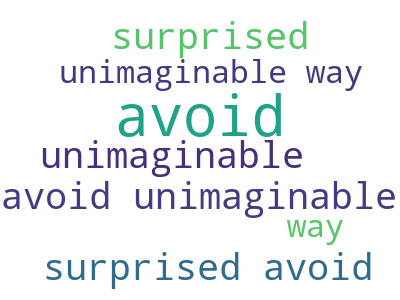

In [42]:
'''
워드 클라우드 적용 코드 정리
'''

getRead_word=pd.read_csv(local+'//csv//bomtoon_jupyter.csv')


# 추가할 영문 불용어 정의
additional_stop_words = ['ha', 'im','tt','going','oh','wow','know','ah','dont','think','come','want','like','good','did','hahahahahahahaha'
                        ,'hahahahahaha','ha']

# scikit-learn에서 제공하는 영어 불용어에 사용자 정의 불용어를 합침
stop_words = list(text.ENGLISH_STOP_WORDS.union(additional_stop_words))


getRead_word['0'].isna().sum()  # 전체 컬럼에 NaN 확인


cv = CountVectorizer(max_features=1000, stop_words = stop_words ,ngram_range=(1,2))  # 문장별로 단어 행렬 변환을 위해  말뭉치전체에 용어빈도를 위해 1000설정/ 중지단어를 위해 sklearn에서 제공하는 english 사용  띄어쓰기를 기본으로 토큰화를 진행하지만, 때로는 단어와 단어의 조합이 의미를 갖는 경우가 있다.                                                             
tr_comment = cv.fit_transform(getRead_word)                # 학습을 위해 fit_transform 사용



words = cv.get_feature_names_out()                               # ndarray 형태로 반환  / 결측치 무결성이 전제 
doc = tr_comment[0].toarray() # 희소행렬 변환


count = tr_comment.sum(axis=0)
word_count = list(zip(words, count.flat))


word_order = sorted(
    word_count,
    key = operator.itemgetter(1), # 0이면 단어순, 1이면 빈도순
    reverse = True                # 내림차순(역순)으로 정렬한다.
)



wc = WordCloud(background_color='white', width=400, height=300)  # 워드클라우드 판 생성
cloud = wc.fit_words(dict(word_count))                           # 드라마 단어 데이터 학습

cloud.to_image() #  학습한 데이터 이미지 생성



In [43]:
'''
LDA 적용 구간 코드 정리
'''


vectorizer = TfidfVectorizer(stop_words=stop_words, max_features= 1000, # 상위 1,000개의 단어를 보존
max_df = 0.5, smooth_idf=True)

#X = vectorizer.fit_transform(getRead_word[colname[1]].values.astype('U'))
X = vectorizer.fit_transform(getRead_word['0'].values.astype('U'))  # astype()을 사용한 데이터형 dtype 변환 (캐스트)

# TF-IDF 행렬의 크기 확인
print('TF-IDF 행렬의 크기 :',X.shape)

svd_model = TruncatedSVD(n_components=20, algorithm='randomized', n_iter=100, random_state=122)
svd_model.fit(X)
terms = vectorizer.get_feature_names_out()

lda_model = LatentDirichletAllocation(n_components=20, random_state=777)

scores = []
for i in range(2, 10):
    lda_model = LatentDirichletAllocation(n_components=i, random_state=1004)
    lda_model.fit(X)
    scores.append(lda_model.perplexity(X))

def get_topics(components, feature_names, n=5):
    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(2)) for i in topic.argsort()[:-n - 1:-1]])

#get_topics(lda_model.components_,terms)

pyLDAvis.enable_notebook()
vis = pyLDAvis.lda_model.prepare(
                        lda_model = lda_model,
                       dtm = X,
                       vectorizer = vectorizer,
                       mds='tsne')
pyLDAvis.display(vis)

TF-IDF 행렬의 크기 : (41, 20)


In [73]:



#getRead_word.rename(index = {'': 'comm'}, inplace = True)

#getRead_word.rename(columns = {'':'comm'}, inplace = True) 

#getRead_word.loc[0]='comm'

ddf=pd.DataFrame(data=getRead_word,columns=['comm'])
ddf

,comm
0,
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,NaN


In [61]:
# Import pandas package 
import pandas as pd 

# Define a dictionary containing ICC rankings 
rankings = {'': ['India', 'South Africa', 'England', 
							'New Zealand', 'Australia'], 
			'odi': ['England', 'India', 'New Zealand', 
							'South Africa', 'Pakistan'], 
			't20': ['Pakistan', 'India', 'Australia', 
							'England', 'New Zealand']} 

# Convert the dictionary into DataFrame 
rankings_pd = pd.DataFrame(rankings) 

# Before renaming the columns 
print(rankings_pd) 

rankings_pd.rename(columns = {'':'TEST'}, inplace = True) 

# After renaming the columns 
print("\nAfter modifying first column:\n", rankings_pd.columns) 


                          odi          t20
0         India       England     Pakistan
1  South Africa         India        India
2       England   New Zealand    Australia
3   New Zealand  South Africa      England
4     Australia      Pakistan  New Zealand

After modifying first column:
 Index(['TEST', 'odi', 't20'], dtype='object')
